<a href="https://colab.research.google.com/github/GDReallyGoodMan/Credit-Scoring/blob/main/Model_for_credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузим данные

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-score-classification' dataset.
Path to dataset files: /kaggle/input/credit-score-classification


Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим данные

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

Using Colab cache for faster access to the 'credit-score-classification' dataset.


In [ ]:
data = pd.read_csv(f'{path}/train.csv')

/tmp/ipython-input-3683744655.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'{path}/train.csv')


In [ ]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Вот она! Наша data!) Но теперь нужно обозначить фичи и почистить данные

In [ ]:
data.drop(columns=['ID', 'Customer_ID'], inplace=True)

In [ ]:
translate = ['Месяц','Имя','Возраст','Номер социального страхования (SSN)','Род занятий','Годовой доход','Ежемесячная зарплата на руках','Количество банковских счетов','Количество кредитных карт','Процентная ставка','Количество кредитов','Тип кредита','Просрочка с даты платежа','Количество просроченных платежей','Измененный кредитный лимит','Количество запросов на кредит','Состав кредитов','Непогашенная задолженность','Коэффициент использования кредита','Возраст кредитной истории','Минимальная сумма платежа','Общая сумма EMI в месяц','Сумма ежемесячного инвестирования','Поведение при оплате','Ежемесячный баланс','Кредитный рейтинг']
for i in range(len(data.columns)):
  cols = data.columns
  print('')
  print(cols[i], '|', translate[i], '|    for examle:', data.iloc[0].values[i])


Month | Месяц |    for examle: January

Name | Имя |    for examle: Aaron Maashoh

Age | Возраст |    for examle: 23

SSN | Номер социального страхования (SSN) |    for examle: 821-00-0265

Occupation | Род занятий |    for examle: Scientist

Annual_Income | Годовой доход |    for examle: 19114.12

Monthly_Inhand_Salary | Ежемесячная зарплата на руках |    for examle: 1824.8433333333328

Num_Bank_Accounts | Количество банковских счетов |    for examle: 3

Num_Credit_Card | Количество кредитных карт |    for examle: 4

Interest_Rate | Процентная ставка |    for examle: 3

Num_of_Loan | Количество кредитов |    for examle: 4

Type_of_Loan | Тип кредита |    for examle: Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan

Delay_from_due_date | Просрочка с даты платежа |    for examle: 3

Num_of_Delayed_Payment | Количество просроченных платежей |    for examle: 7

Changed_Credit_Limit | Измененный кредитный лимит |    for examle: 11.27

Num_Credit_Inquiries | Количество з

In [ ]:
# data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
# data[data['Age'] <= 0] = np.nan

In [ ]:
data[data.describe(include='object').columns].head()

,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
not_cat_features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly','Monthly_Balance']
for cat in not_cat_features:
  data[cat] = pd.to_numeric(data[cat], errors='coerce')
  data[data[cat] <= 0] = np.nan

Уже знаем про годовую зарплату, зачем нам знать месячную?

In [ ]:
data.drop(columns=['Monthly_Inhand_Salary'], inplace=True)

In [ ]:
data[data.describe(include='object').columns].head()

,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,NaN,No,Low_spent_Large_value_payments,Good
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,Good


Чудесно, мы почти отделили категориальные признаки от числовых. Почему почти? У нас в Credit_History_Age хранятся числа, но нужно перевести их в Credit_History_Years и Credit_History_Months

Для людей у которых он не указан будем считать, что у них не было кредитной истории

In [ ]:
data['Credit_History_Age'] = data['Credit_History_Age'].fillna("0 years and 0 months")
data['Credit_History_Years'] = data['Credit_History_Age'].map(lambda row: float(row.split(' ')[0]))
data['Credit_History_Months'] = data['Credit_History_Age'].map(lambda row: float(row.split(' ')[3]))


In [ ]:
data

,Month,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3.0,4.0,3.0,4.0,...,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.0,1.0
1,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3.0,4.0,3.0,4.0,...,31.944960,0 years and 0 months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0 years and 0 months,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3.0,4.0,3.0,4.0,...,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.0,4.0
4,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3.0,4.0,3.0,4.0,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,4.0,6.0,7.0,2.0,...,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,31.0,6.0
99996,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,4.0,6.0,7.0,2.0,...,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,31.0,7.0
99997,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,4.0,6.0,5729.0,2.0,...,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,31.0,8.0
99998,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,4.0,6.0,7.0,2.0,...,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,31.0,9.0


In [ ]:
data = data.drop(columns=['Credit_History_Age'])

Как бы нам этого не хотелось, но мы вынуждены удалить объекты с target = Nan, поскольку это может плохо сказаться на предсказании модели

In [ ]:
data = data.dropna(subset=['Credit_Score'])

In [ ]:
not_cat_features += ['Credit_History_Years', 'Credit_History_Months']

In [ ]:
cat_features = data.select_dtypes('object').drop(columns=['Credit_Score']).columns.tolist()
number_features = data.select_dtypes('float').columns.tolist()

target_feature = 'Credit_Score'

In [ ]:
target_feature

'Credit_Score'

In [ ]:
for col in cat_features:
    data[col] = data[col].fillna('missing')
for col in number_features:
    data[col] = data[col].fillna(data[col].median())

Т.к. мы будем давать скор людям из России, то нужно перевести финансовые данные в датасете из долларов в рубли и поделить на 7 (т.к. в среднем, россиянин получает в 7 раз меньше жителя США). Будем считать, что нынче курс равен 80 рублей за 1$

In [ ]:
Finances = ["Annual_Income" ,"Outstanding_Debt" ,"Total_EMI_per_month" ,"Amount_invested_monthly" ,"Monthly_Balance"]
data[Finances] = (data[Finances] * 80) / 7

Посмотрим на баланс классов:

In [ ]:
data['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,43504
Poor,25800
Good,12622


Видим небольшой дисбаланс, но это скорее похоже на нормальное распределение, так что все в порядке.

Будем использовать CatBoost (собственно поэтому я не особо сильно занимался features engineering и не делал глубокого анализа всех корреляций)

In [ ]:
!pip install catboost

In [ ]:
X = data[cat_features + number_features]
y = data[target_feature]


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
model = CatBoostClassifier(
    iterations = 500,
    learning_rate = 0.1,
    depth = 6,
    cat_features = cat_features,
    loss_function = "MultiClass",
    verbose = 10
)

cv = StratifiedKFold(n_splits=3, shuffle=True)

scores = cross_val_score(model, X, y, cv=cv, scoring='neg_log_loss')
print("Средний многоклассовый logloss:", -scores.mean())

0:	learn: 1.0338564	total: 425ms	remaining: 3m 32s
10:	learn: 0.6918692	total: 6s	remaining: 4m 26s
20:	learn: 0.5832673	total: 8.78s	remaining: 3m 20s
30:	learn: 0.5474722	total: 12s	remaining: 3m 1s
40:	learn: 0.5304621	total: 15.2s	remaining: 2m 50s
50:	learn: 0.5194734	total: 20.3s	remaining: 2m 58s
60:	learn: 0.5120913	total: 24s	remaining: 2m 53s
70:	learn: 0.5076833	total: 27.4s	remaining: 2m 45s
80:	learn: 0.5043324	total: 32.6s	remaining: 2m 48s
90:	learn: 0.5000251	total: 36.3s	remaining: 2m 43s
100:	learn: 0.4975649	total: 39.8s	remaining: 2m 37s
110:	learn: 0.4943715	total: 44.4s	remaining: 2m 35s
120:	learn: 0.4918957	total: 48.3s	remaining: 2m 31s
130:	learn: 0.4893305	total: 52s	remaining: 2m 26s
140:	learn: 0.4872666	total: 56s	remaining: 2m 22s
150:	learn: 0.4851365	total: 1m 1s	remaining: 2m 21s
160:	learn: 0.4835550	total: 1m 4s	remaining: 2m 16s
170:	learn: 0.4816540	total: 1m 8s	remaining: 2m 11s
180:	learn: 0.4797886	total: 1m 13s	remaining: 2m 8s
190:	learn: 0.47

In [ ]:
model.fit(X,y)

0:	learn: 1.0331352	total: 633ms	remaining: 5m 16s
10:	learn: 0.6445441	total: 5.57s	remaining: 4m 7s
20:	learn: 0.5458865	total: 10.5s	remaining: 3m 59s
30:	learn: 0.5120480	total: 15.3s	remaining: 3m 51s
40:	learn: 0.4960338	total: 21.3s	remaining: 3m 58s
50:	learn: 0.4843245	total: 26.5s	remaining: 3m 53s
60:	learn: 0.4772921	total: 33.1s	remaining: 3m 58s
70:	learn: 0.4721326	total: 38.5s	remaining: 3m 52s
80:	learn: 0.4674382	total: 44.6s	remaining: 3m 50s
90:	learn: 0.4648822	total: 50.3s	remaining: 3m 46s
100:	learn: 0.4615282	total: 55.6s	remaining: 3m 39s
110:	learn: 0.4595548	total: 1m 1s	remaining: 3m 37s
120:	learn: 0.4574083	total: 1m 7s	remaining: 3m 30s
130:	learn: 0.4554151	total: 1m 13s	remaining: 3m 27s
140:	learn: 0.4533322	total: 1m 19s	remaining: 3m 21s
150:	learn: 0.4517501	total: 1m 25s	remaining: 3m 17s
160:	learn: 0.4502679	total: 1m 30s	remaining: 3m 10s
170:	learn: 0.4490074	total: 1m 37s	remaining: 3m 6s
180:	learn: 0.4475853	total: 1m 42s	remaining: 3m
190:

Проверим всё на тесте

In [440]:
data = pd.read_csv(f'{path}/test.csv')

In [441]:
data.drop(columns=['ID', 'Customer_ID'], inplace=True)

not_cat_features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly','Monthly_Balance']
for cat in not_cat_features:
  data[cat] = pd.to_numeric(data[cat], errors='coerce')
  data[data[cat] <= 0] = np.nan

data.drop(columns=['Monthly_Inhand_Salary'], inplace=True)

data['Credit_History_Age'] = data['Credit_History_Age'].fillna("0 years and 0 months")
data['Credit_History_Years'] = data['Credit_History_Age'].map(lambda row: float(row.split(' ')[0]))
data['Credit_History_Months'] = data['Credit_History_Age'].map(lambda row: float(row.split(' ')[3]))

data = data.drop(columns=['Credit_History_Age'])

not_cat_features += ['Credit_History_Years', 'Credit_History_Months']

cat_features = data.select_dtypes('object').columns.tolist()
number_features = data.select_dtypes('float').columns.tolist()

for col in cat_features:
    data[col] = data[col].fillna('missing')
for col in number_features:
    data[col] = data[col].fillna(data[col].median())

Finances = ["Annual_Income" ,"Outstanding_Debt" ,"Total_EMI_per_month" ,"Amount_invested_monthly" ,"Monthly_Balance"]
data[Finances] = (data[Finances] * 80) / 7


In [442]:
X_test = data[cat_features + number_features]

In [444]:
pred = model.predict(X_test)

In [454]:
pd.DataFrame(pred,columns=['Credit_Score_Pred']).value_counts()

,count
Credit_Score_Pred,
Standard,29403
Poor,14818
Good,5779


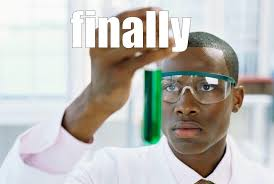

In [455]:
model.save_model("credit_model.cbm")